In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

### Data Loading

In [2]:
# Loads the imdb dataset from tensorflow datasets
imdb, info = tfds.load("imdb_reviews/subwords8k", 
                       with_info=True, 
                       as_supervised=True)

Shuffling and writing examples to /Users/nialdaly/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIUAH9Z/imdb_reviews-train.tfrecord


Shuffling and writing examples to /Users/nialdaly/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIUAH9Z/imdb_reviews-test.tfrecord


Shuffling and writing examples to /Users/nialdaly/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIUAH9Z/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /Users/nialdaly/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


### Data Preprocessing

In [3]:
train_data, test_data = imdb['train'], imdb['test']

In [4]:
tokenizer = info.features['text'].encoder

In [8]:
# Prints 1st 30 words in the tokenizer
print(tokenizer.subwords[:30])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_']


In [9]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [11]:
for ts in tokenized_string:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [12]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, 
                                           tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_data.padded_batch(BATCH_SIZE, 
                                      tf.compat.v1.data.get_output_shapes(test_data))

### Model Architecture

In [13]:
# Sets the embedding dimension size
embedding_dim = 64

# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [15]:
# Sets the number of epochs for training
num_epochs = 10

# Compiles the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fits the model
history = model.fit(train_dataset, 
                    epochs=num_epochs, 
                    validation_data=test_dataset)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
390/391 [============================>.] - ETA: 0s - loss: 0.6739 - accuracy: 0.6245WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe1f60088c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
391/391 [==============================] - 9s 24ms/step - loss: 0.6738 - accuracy: 0.6248 - val_loss: 0.6243 - val_accuracy: 0.7210
Epoch 2/10
391/391 [==============================] - 11s 29ms/step - loss: 0.5176 - accuracy: 0.8025 - val_loss: 0.4483 - val_accuracy: 0.8355
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 0.3695 - accuracy: 0.8686 - val_loss: 0.3723 - val_accuracy: 0.8488
Epoch 4/10
391/391 [==============================] - 11s 27ms/step - loss: 0.3005 - accuracy: 0.8935 - val_loss: 0.3301 - val_accuracy: 0.8710
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2601 - accuracy: 0.9073 - val_loss: 0.3193 - val_acc

### Model Evaluation

In [16]:
import matplotlib.pyplot as plt

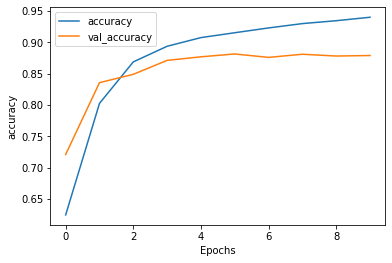

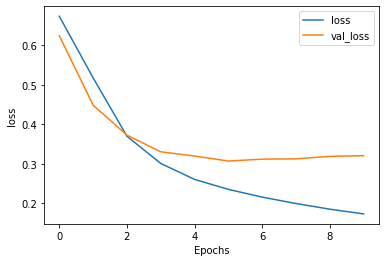

In [17]:
# Plot graphs function
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Calls the plot graphs function
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [18]:
e = model.layers[0]
weights = e.get_weights()[0]
# Shape: (vocab_size, embedding_dim)
print(weights.shape)

(8185, 64)


In [19]:
import io

In [33]:
out_v = io.open('./data/vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('./data/meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()